# <center>Predict Loan Eligibility for Dream Housing Finance company</center>

![image](https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png)

# <center> Problem Statement</center>

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

import warnings

import ppscore as pps

import missingno as mno

warnings.filterwarnings("ignore")

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print("Train data shape : ",train.shape)
print("Test data shape : ",test.shape)


Train data shape :  (614, 13)
Test data shape :  (367, 12)


In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train["Loan_Status"] = train["Loan_Status"].replace("Y" , 1)
train["Loan_Status"] = train["Loan_Status"].replace("N" , 0)

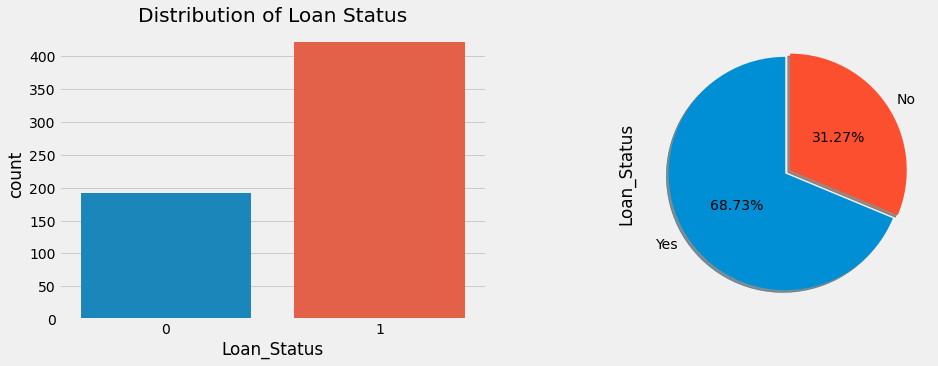

In [10]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['Loan_Status'],)
plt.title("Distribution of Loan Status")


plt.subplot(1, 2, 2)
train['Loan_Status'].value_counts().plot(kind = 'pie', explode = [0, 0.05], autopct = '%.2f%%', startangle = 90,
                                       labels = ['Yes','No'], shadow = True, pctdistance = 0.5)

# Missing Value

### Treatment of Training Data Missing Values

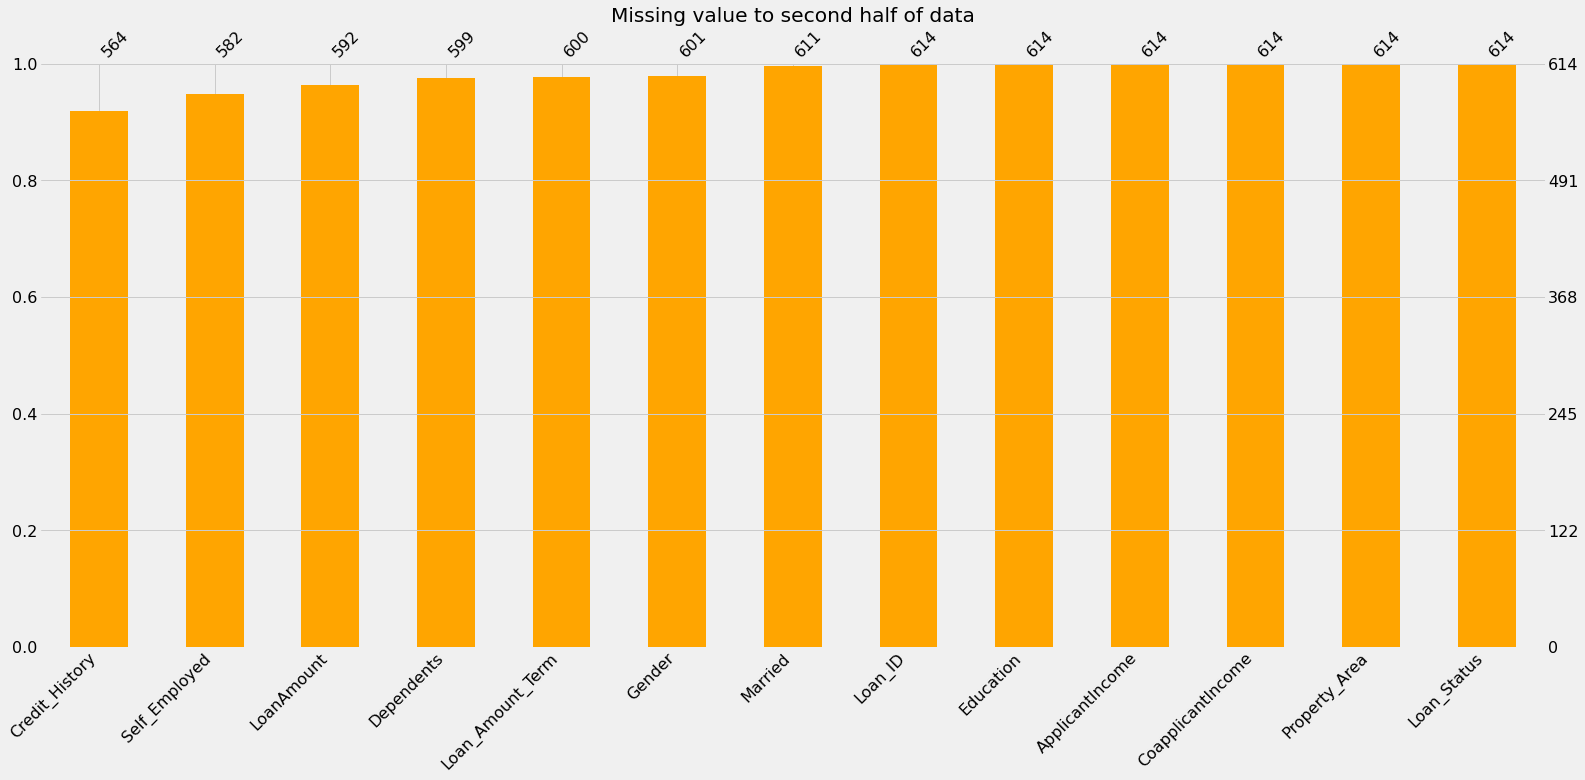

In [11]:
mno.bar(train,
        color= "orange",
        sort="ascending"
       )
plt.title("Missing value to second half of data")
plt.show()

In [12]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace=True)

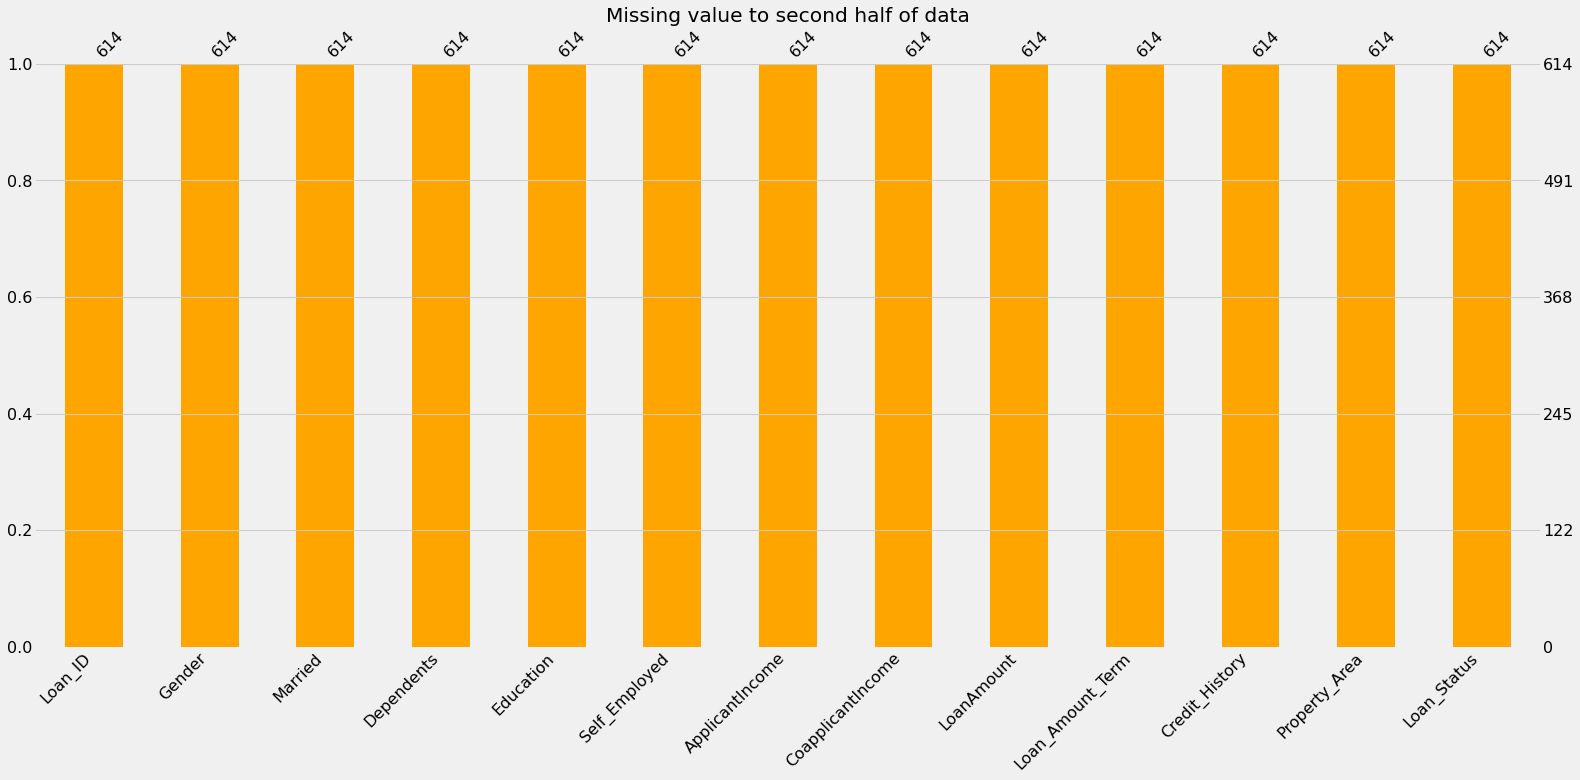

In [13]:
mno.bar(train,
        color= "orange",
        sort="ascending"
       )
plt.title("Missing value to second half of data")
plt.show()

### Treatment of Testing Data Missing Values

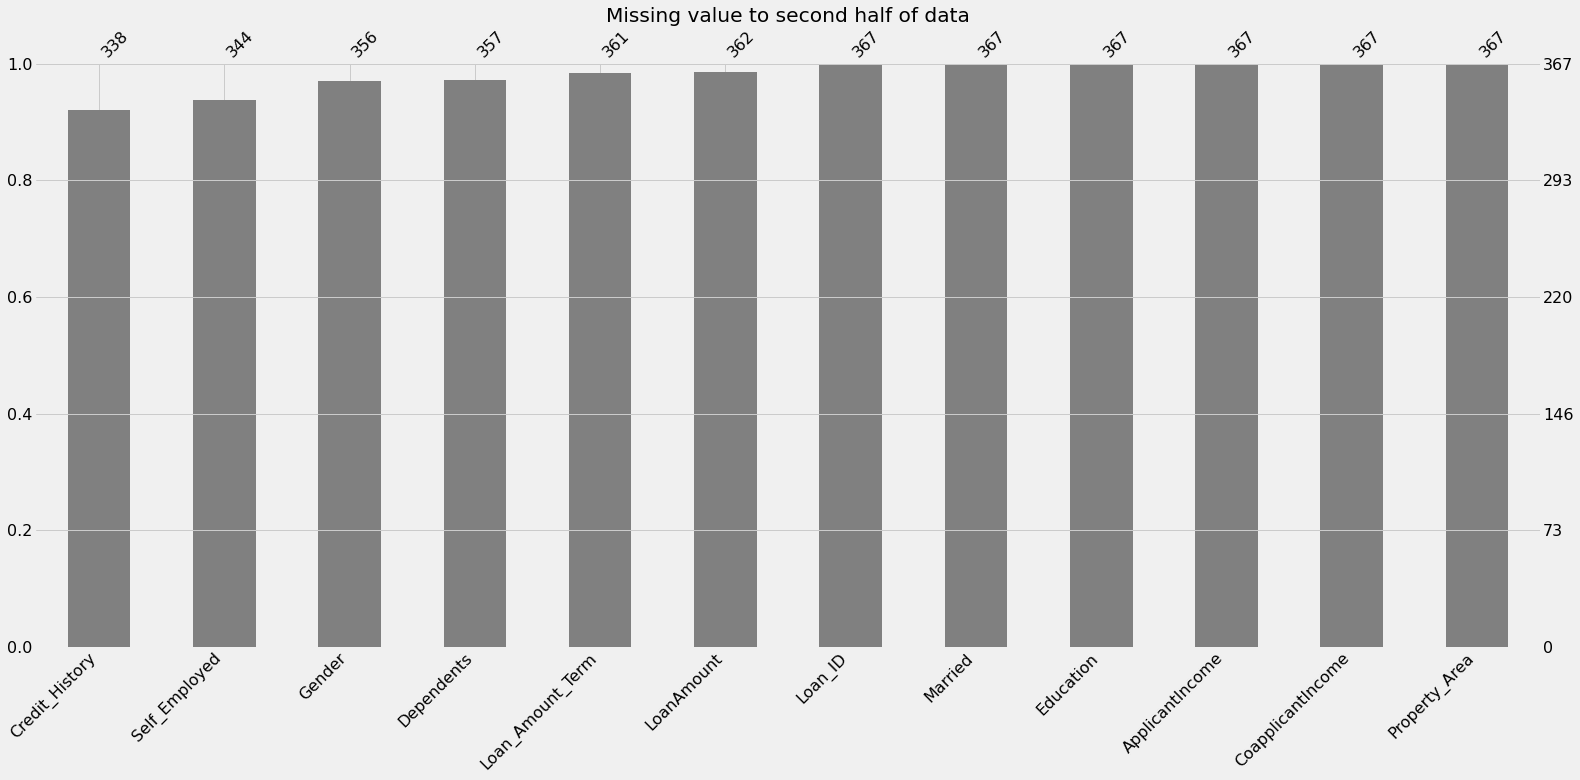

In [14]:
mno.bar(test,
        color= "gray",
        sort="ascending"
       )
plt.title("Missing value to second half of data")
plt.show()

In [15]:
test["Gender"].fillna(test["Gender"].mode()[0], inplace=True)
test["Married"].fillna(test["Married"].mode()[0], inplace=True)
test["Dependents"].fillna(test["Dependents"].mode()[0], inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0], inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0], inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0], inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(), inplace=True)

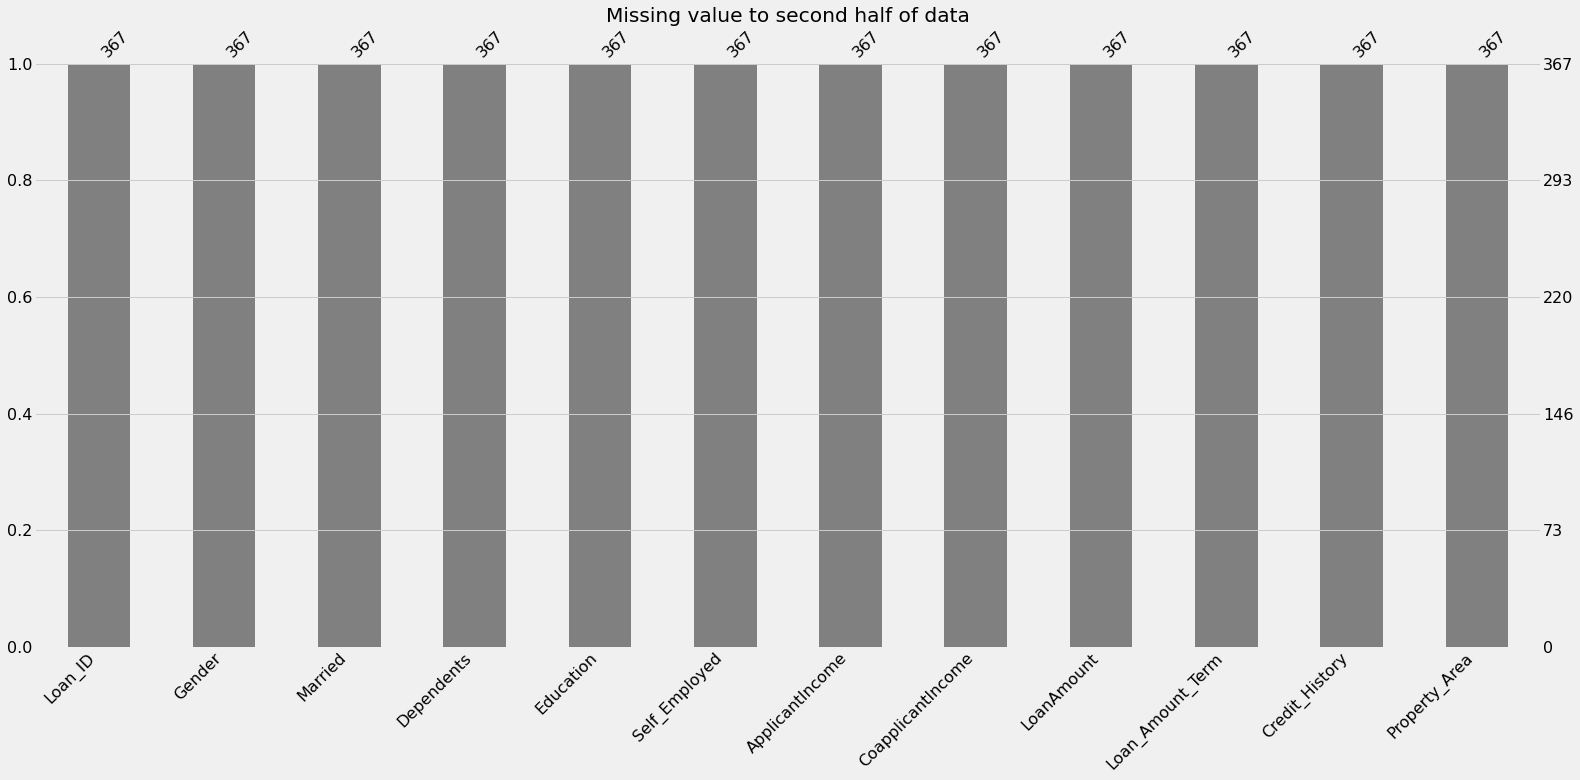

In [16]:
mno.bar(test,
        color= "gray",
        sort="ascending"
       )
plt.title("Missing value to second half of data")
plt.show()

In [17]:
train.isnull().sum().sum()

0

# Data Visualization

## <center>Univariate Analysis</center>

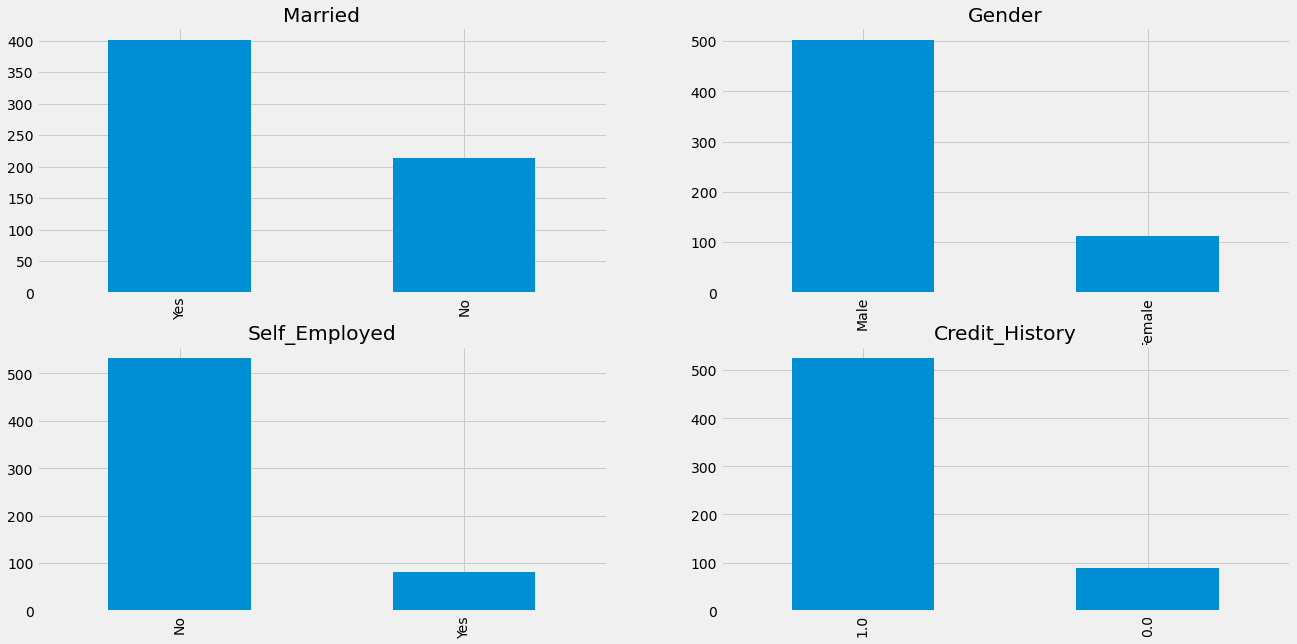

In [18]:

plt.subplot(2,2,1)
train["Married"].value_counts().plot.bar(figsize=(20,10))
plt.title("Married")

plt.subplot(2,2,2)
train["Gender"].value_counts().plot.bar()
plt.title("Gender")

plt.subplot(2,2,3)
train["Self_Employed"].value_counts().plot.bar()
plt.title("Self_Employed")

plt.subplot(2,2,4)
train["Credit_History"].value_counts().plot.bar()
plt.title("Credit_History")

plt.show()

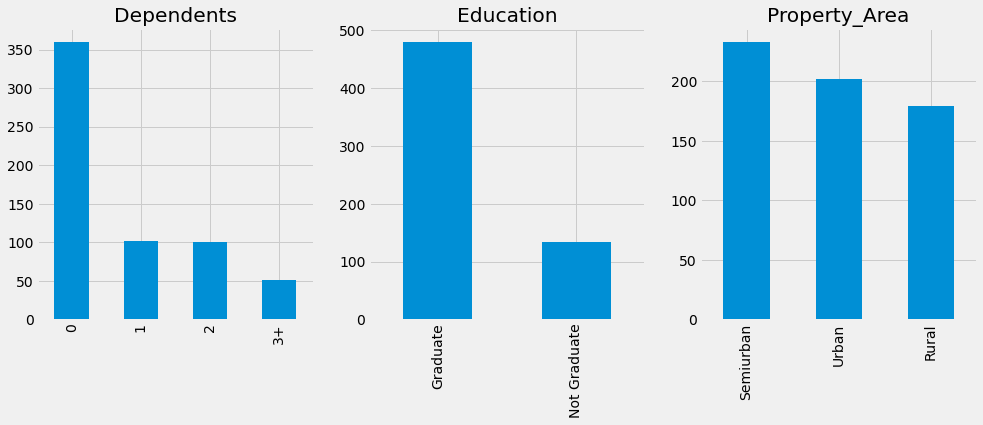

In [19]:
plt.subplot(1,3,1)
train["Dependents"].value_counts().plot.bar()
plt.title("Dependents")

plt.subplot(1,3,2)
train["Education"].value_counts().plot.bar()
plt.title("Education")

plt.subplot(1,3,3)
train["Property_Area"].value_counts().plot.bar()
plt.title("Property_Area")



plt.show()

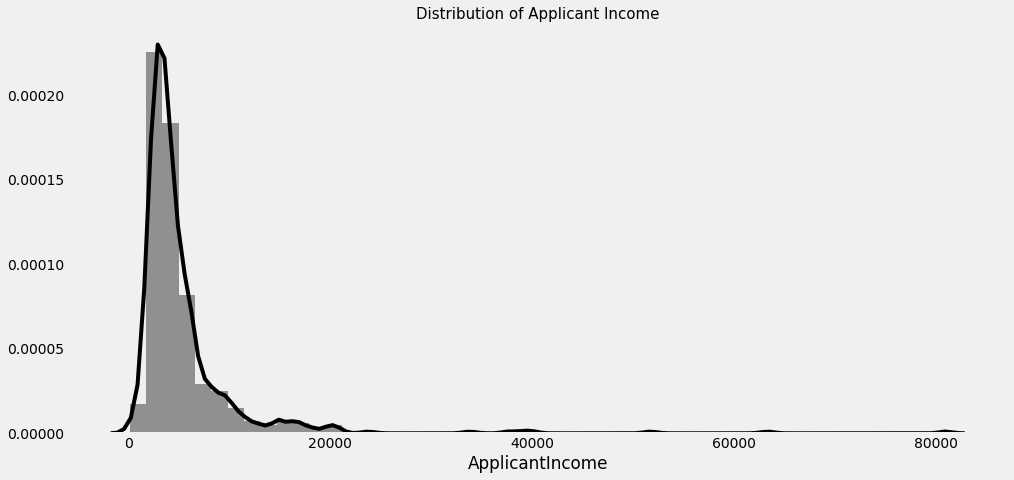

In [20]:
plt.rcParams["figure.figsize"] =(15,7)
sns.distplot(train["ApplicantIncome"], color="black")
plt.title("Distribution of Applicant Income", fontsize=15)
plt.grid()
plt.show()

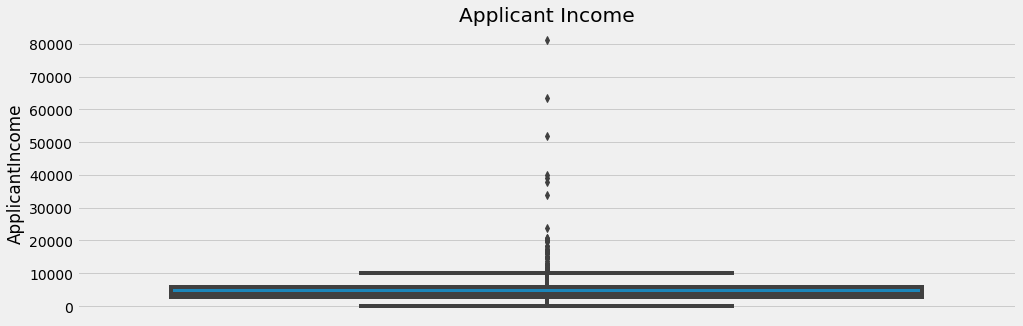

In [21]:
plt.rcParams["figure.figsize"] =(15,5)
sns.boxplot(y =train["ApplicantIncome"])
plt.title("Applicant Income")
plt.show()

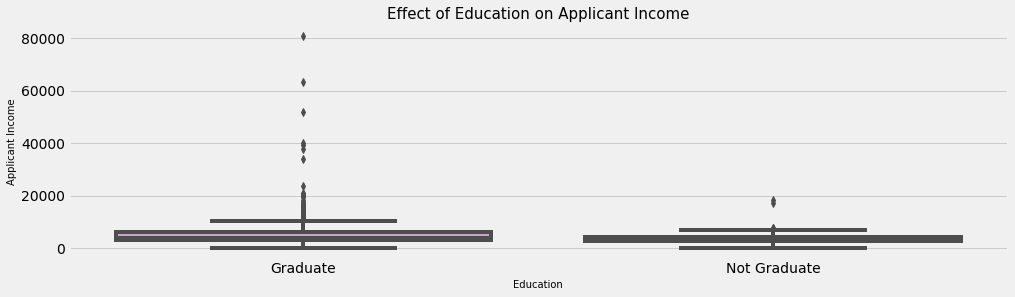

In [22]:
plt.rcParams['figure.figsize'] = (15,4)
sns.boxplot(train['Education'], train['ApplicantIncome'], palette = 'PuRd')
plt.title('Effect of Education on Applicant Income', fontsize = 15)
plt.xlabel('Education', fontsize = 10)
plt.ylabel('Applicant Income', fontsize = 10)
plt.show()

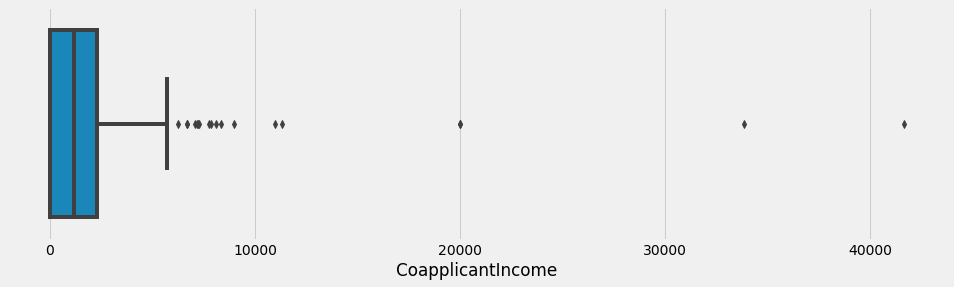

In [23]:
sns.boxplot(train["CoapplicantIncome"])
plt.show()

## <center>Bivariate Analysis</center>

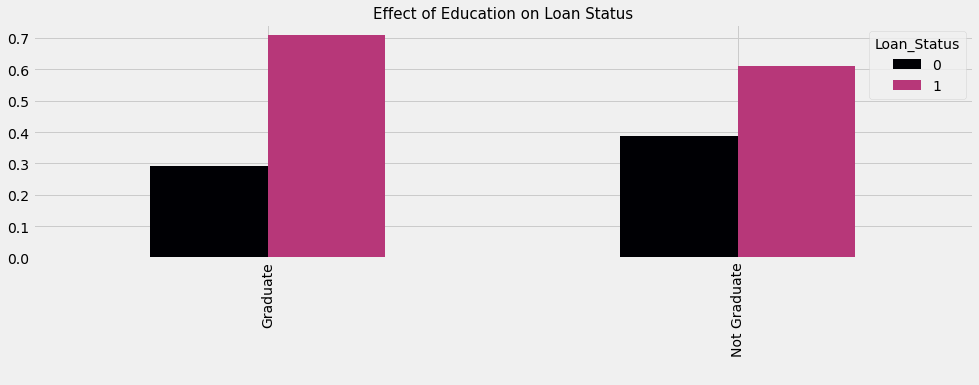

In [24]:
plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['Education'], train['Loan_Status'])
colors = plt.cm.magma(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Education on Loan Status', fontsize = 15)
plt.xlabel(' ')
plt.show()

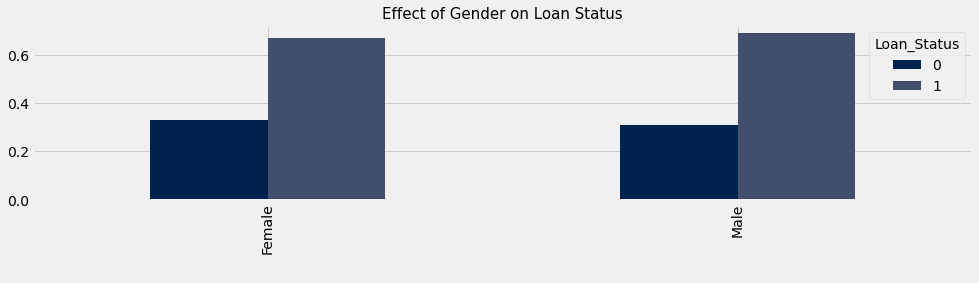

In [25]:
plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['Gender'], train['Loan_Status'])
colors = plt.cm.cividis(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Gender on Loan Status', fontsize = 15)
plt.xlabel(' ')
plt.show()

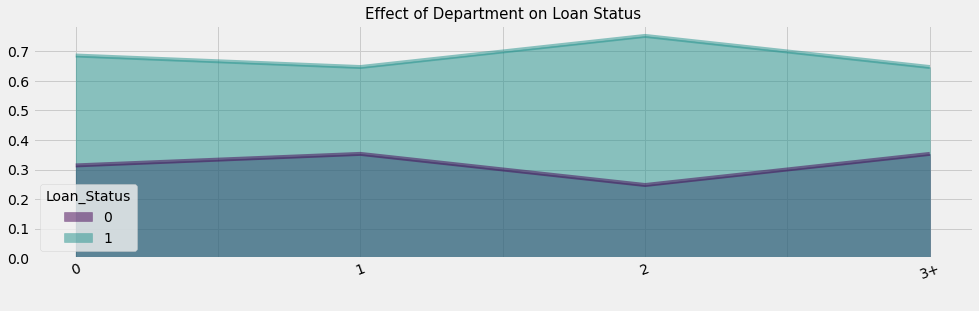

In [26]:
plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['Dependents'], train['Loan_Status'])
colors = plt.cm.viridis(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False, color = colors)
plt.title('Effect of Department on Loan Status', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

In [27]:
plt.rcParams['figure.figsize'] = (15, 4)
@interact_manual
def bivariate_plot(column1 = list(train.select_dtypes('object').columns),
                   column2 = list(train.select_dtypes('number').columns[1:])):
    sns.barplot(train[column1], train[column2])

interactive(children=(Dropdown(description='column1', options=('Loan_ID', 'Gender', 'Married', 'Dependents', '…

## <center>Multivariate Analysis</Center>
Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

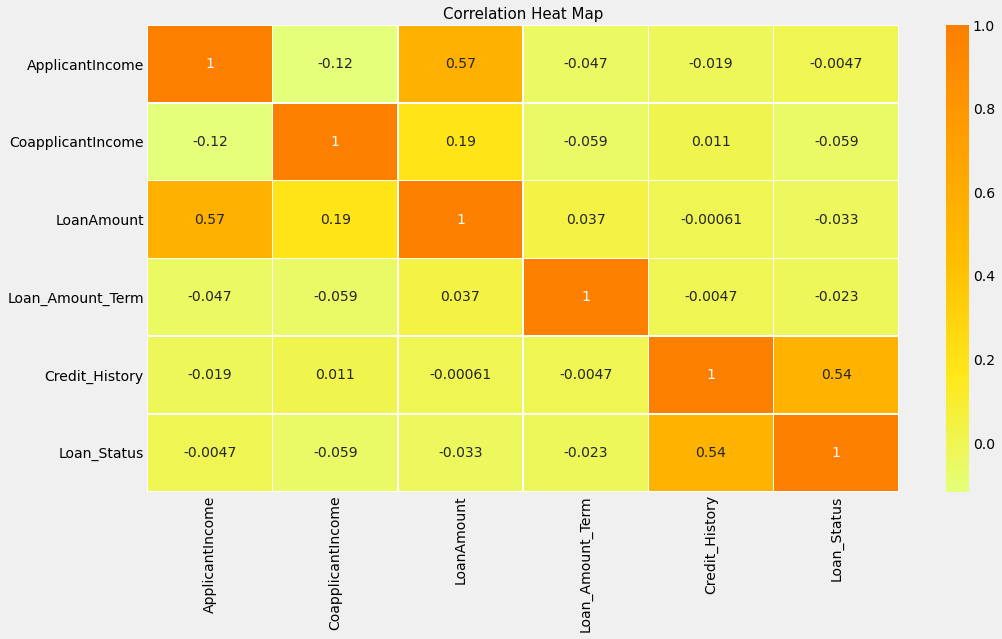

In [28]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

# Outlier Treatment

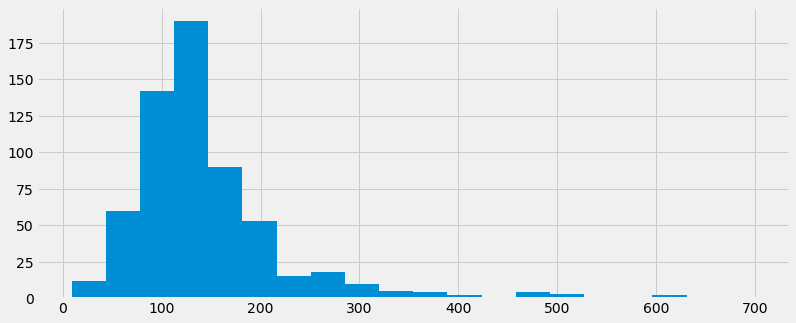

In [29]:
plt.rcParams["figure.figsize"] = (12,5)
train["LoanAmount"].hist(bins=20),
plt.show()

In [30]:
train["LoanAmount_log"] = np.log(train["LoanAmount"])

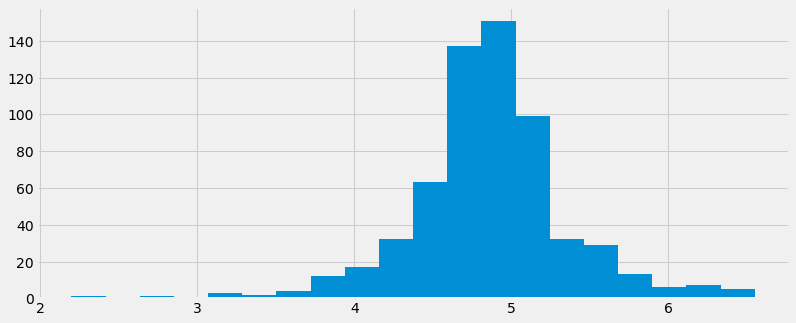

In [31]:
train["LoanAmount_log"].hist(bins=20)
plt.show()

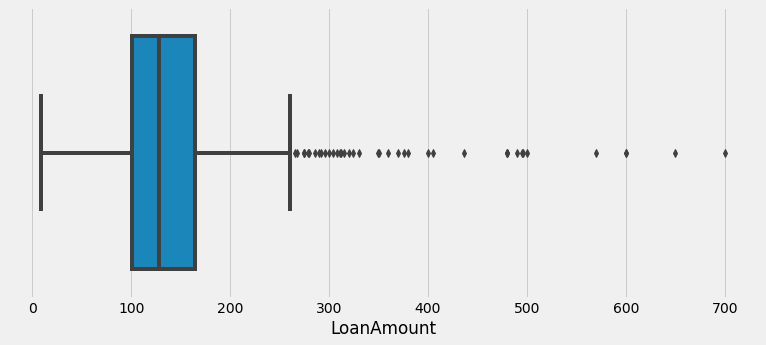

In [32]:
sns.boxplot(train["LoanAmount"])

# Model Building

In [33]:
train = train.drop('Loan_ID',1)

In [34]:
x = train.drop("Loan_Status",1)
y = train.Loan_Status

In [35]:
print(x.shape)
print(y.shape)

(614, 12)
(614,)


In [36]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [37]:
x = pd.get_dummies(x)
test = pd.get_dummies(test)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 21)
(185, 21)
(429,)
(185,)


In [40]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [41]:
pred = lr.predict(x_test)

In [42]:
accuracy_score(y_test, pred)

0.7837837837837838